In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
tickers = ["BLK", "BAC", "AAPL", "TM", "WMT",
           "JD", "INTU", "MA", "UL", "CVS",
           "DIS", "AMD", "NVDA", "PBI", "TGT"]

In [3]:
ohlc = yf.download(tickers, period="3y")

[*********************100%***********************]  15 of 15 completed


In [4]:
ohlc.tail()
prices = ohlc["Adj Close"].dropna(how="all")
prices.tail()     

,AAPL,AMD,BAC,BLK,CVS,DIS,INTU,JD,MA,NVDA,PBI,TGT,TM,UL,WMT
Date,,,,,,,,,,,,,,,
2023-08-07,178.608810,116.809998,31.879999,712.549988,73.910004,86.830002,505.260010,38.910000,396.869995,454.170013,3.41,131.940002,173.389999,52.209999,159.921494
2023-08-08,179.557526,113.230003,31.270000,696.979980,74.000000,88.129997,500.809998,38.049999,393.190002,446.640015,3.46,130.979996,170.289993,52.080002,160.080917
2023-08-09,177.949707,110.470001,30.860001,692.090027,74.599998,87.489998,496.700012,37.669998,393.670013,425.540009,3.51,130.600006,167.229996,52.119999,160.339996
2023-08-10,177.729996,110.230003,30.940001,697.010010,73.959999,91.760002,501.470001,38.490002,397.140015,423.880005,3.48,130.919998,167.660004,52.259998,160.259995
2023-08-11,177.789993,107.570000,31.290001,695.609985,74.870003,89.019997,497.769989,36.459999,394.980011,408.549988,3.50,131.050003,167.279999,51.930000,161.199997


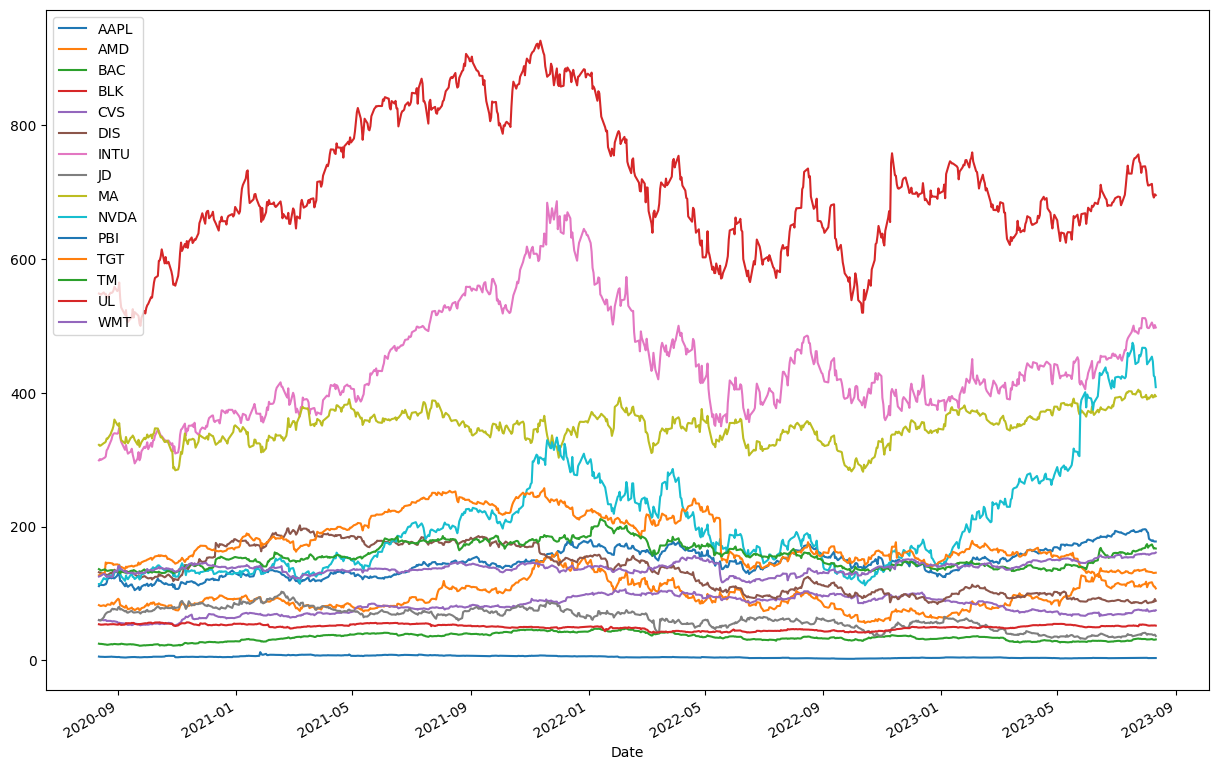

In [5]:
prices[prices.index >= "2020-01-01"].plot(figsize=(15,10));

In [6]:
# Calculate the covariance matrix 

from pypfopt import risk_models
from pypfopt import plotting

sample_cov = risk_models.sample_cov(prices, frequency=252)
sample_cov
     


,AAPL,AMD,BAC,BLK,CVS,DIS,INTU,JD,MA,NVDA,PBI,TGT,TM,UL,WMT
AAPL,0.092615,0.091213,0.026310,0.048775,0.016538,0.037735,0.072684,0.058337,0.046487,0.103228,0.057831,0.038542,0.027539,0.017181,0.020576
AMD,0.091213,0.258696,0.040804,0.074520,0.015344,0.056494,0.114416,0.104887,0.063198,0.218453,0.082080,0.057473,0.041360,0.018448,0.018952
BAC,0.026310,0.040804,0.090287,0.050843,0.032091,0.049081,0.036583,0.034499,0.040908,0.043004,0.070351,0.034321,0.030272,0.013846,0.011937
BLK,0.048775,0.074520,0.050843,0.080252,0.024571,0.047113,0.064127,0.048952,0.048774,0.085458,0.057729,0.043731,0.031091,0.019269,0.019196
CVS,0.016538,0.015344,0.032091,0.024571,0.061459,0.020761,0.016427,-0.000335,0.017659,0.013345,0.031932,0.023765,0.014650,0.010909,0.014708
DIS,0.037735,0.056494,0.049081,0.047113,0.020761,0.102057,0.055918,0.042634,0.051416,0.065057,0.060116,0.038215,0.028639,0.013334,0.014172
INTU,0.072684,0.114416,0.036583,0.064127,0.016427,0.055918,0.139941,0.077349,0.061857,0.132917,0.059109,0.052943,0.032925,0.020361,0.019475
JD,0.058337,0.104887,0.034499,0.048952,-0.000335,0.042634,0.077349,0.351320,0.045457,0.111667,0.075409,0.044245,0.037268,0.021011,0.005216
MA,0.046487,0.063198,0.040908,0.048774,0.017659,0.051416,0.061857,0.045457,0.082757,0.070837,0.056261,0.029402,0.026871,0.018139,0.012955
NVDA,0.103228,0.218453,0.043004,0.085458,0.013345,0.065057,0.132917,0.111667,0.070837,0.288850,0.077606,0.064163,0.049086,0.021667,0.022729


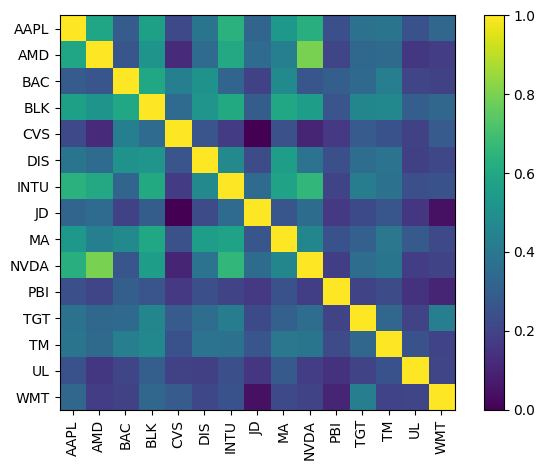

In [7]:
plotting.plot_covariance(sample_cov, plot_correlation=True);
     

However, the sample covariance matrix should not be the default choice for risk model. In the below we will use Ledoit-Wolf shrinkage that reduces extreme values.

In [8]:
from pypfopt import expected_returns

mu = expected_returns.capm_return(prices)
mu

AAPL    0.112525
AMD     0.173843
BAC     0.094101
BLK     0.111154
CVS     0.058429
DIS     0.103604
INTU    0.137192
JD      0.149546
MA      0.102408
NVDA    0.187525
PBI     0.188197
TGT     0.101487
TM      0.077103
UL      0.055222
WMT     0.052781
Name: mkt, dtype: float64

In [9]:
from pypfopt import EfficientFrontier
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()
ef = EfficientFrontier(mu, S, weight_bounds = (0,1))

In [10]:
ef.max_sharpe()
weights = ef.clean_weights()
weights

OrderedDict([('AAPL', 0.06715),
             ('AMD', 0.06867),
             ('BAC', 0.06787),
             ('BLK', 0.06975),
             ('CVS', 0.0634),
             ('DIS', 0.06754),
             ('INTU', 0.06931),
             ('JD', 0.0682),
             ('MA', 0.06691),
             ('NVDA', 0.07064),
             ('PBI', 0.06949),
             ('TGT', 0.06915),
             ('TM', 0.06249),
             ('UL', 0.06065),
             ('WMT', 0.0588)])

In [11]:
ef.portfolio_performance(verbose = True)

Expected annual return: 11.6%
Annual volatility: 22.4%
Sharpe Ratio: 0.43


(0.1155066677031285, 0.22368508901670403, 0.4269693081598138)

## Adding an ESG score constraint

In [12]:
esg_scores = [0.8, 0.8, 0.4, 0.3, 0.3, 0.5, 0.3, 0.6, 0.7, 0.2, 0.4, 0.1, 0.5, 0.4, 0.8]

In [13]:
portfolio_min_score = 0.6 # create a portfolio with min 0.6 ESG score

In [14]:
ef_esg = EfficientFrontier(mu, S)
ef_esg.add_constraint(lambda w: esg_scores @ w >= portfolio_min_score)
ef_esg.max_sharpe()

OrderedDict([('AAPL', 0.1289216716519357),
             ('AMD', 0.119809376572325),
             ('BAC', 0.0708932648534174),
             ('BLK', 0.0282266338693367),
             ('CVS', 0.0174968008377814),
             ('DIS', 0.0727741206906825),
             ('INTU', 0.0370058483240376),
             ('JD', 0.0733442309457373),
             ('MA', 0.1104839926963458),
             ('NVDA', 0.0213647942386824),
             ('PBI', 0.0680872698131992),
             ('TGT', 0.0171550727411627),
             ('TM', 0.065609793768262),
             ('UL', 0.0274582433982161),
             ('WMT', 0.141368885598878)])

In [15]:
ef_esg.portfolio_performance(verbose = True)

Expected annual return: 11.4%
Annual volatility: 22.2%
Sharpe Ratio: 0.42


(0.11366307728951987, 0.22237677245244694, 0.42119091961166394)

<Axes: xlabel='Volatility', ylabel='Return'>

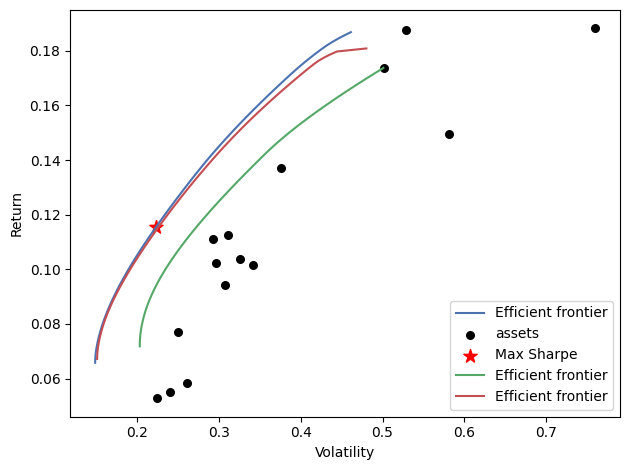

In [22]:
ef = EfficientFrontier(mu, S, weight_bounds = (0,1))
fig, ax = plt.subplots()
ef_max_sharpe = ef.deepcopy()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=True)

# Find the tangency portfolio
ef_max_sharpe.max_sharpe()
ret_tangent, std_tangent, _ = ef_max_sharpe.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Max Sharpe")

ef_esg_aggressive = EfficientFrontier(mu, S)
portfolio_min_score = 0.8
ef_esg_aggressive.add_constraint(lambda w: esg_scores @ w >= portfolio_min_score)
plotting.plot_efficient_frontier(ef_esg_aggressive, ax=ax, show_assets=False)

ef_esg_mild = EfficientFrontier(mu, S)
portfolio_min_score = 0.6
ef_esg_mild.add_constraint(lambda w: esg_scores @ w >= portfolio_min_score)
plotting.plot_efficient_frontier(ef_esg_mild, ax=ax, show_assets=False)


In [17]:
ef_esg_mild = EfficientFrontier(mu, S)
portfolio_min_score = 0.6
ef_esg_mild.add_constraint(lambda w: esg_scores @ w >= portfolio_min_score)
ef_esg_mild.max_sharpe()
esg_mild = ef_esg_mild.portfolio_performance(verbose = False)

In [18]:
ef_esg_aggressive = EfficientFrontier(mu, S)
portfolio_min_score = 0.8
ef_esg_aggressive.add_constraint(lambda w: esg_scores @ w >= portfolio_min_score)
ef_esg_aggressive.max_sharpe()
esg_agg = ef_esg_aggressive.portfolio_performance(verbose = False)

In [19]:
ef = EfficientFrontier(mu, S, weight_bounds = (0,1))
ef.max_sharpe()
no_esg = ef.portfolio_performance(verbose = False)

In [20]:
df = pd.DataFrame({'no_esg_constraints' : no_esg, 'mild_esg_target' : esg_mild, 'aggressive_esg_target' : esg_agg})
df.index = ['Expected ann return', 'Ann Vol', 'Sharpe Ratio']
df

,no_esg_constraints,mild_esg_target,aggressive_esg_target
Expected ann return,0.115507,0.113663,0.118241
Ann Vol,0.223685,0.222377,0.280743
Sharpe Ratio,0.426969,0.421191,0.349931
